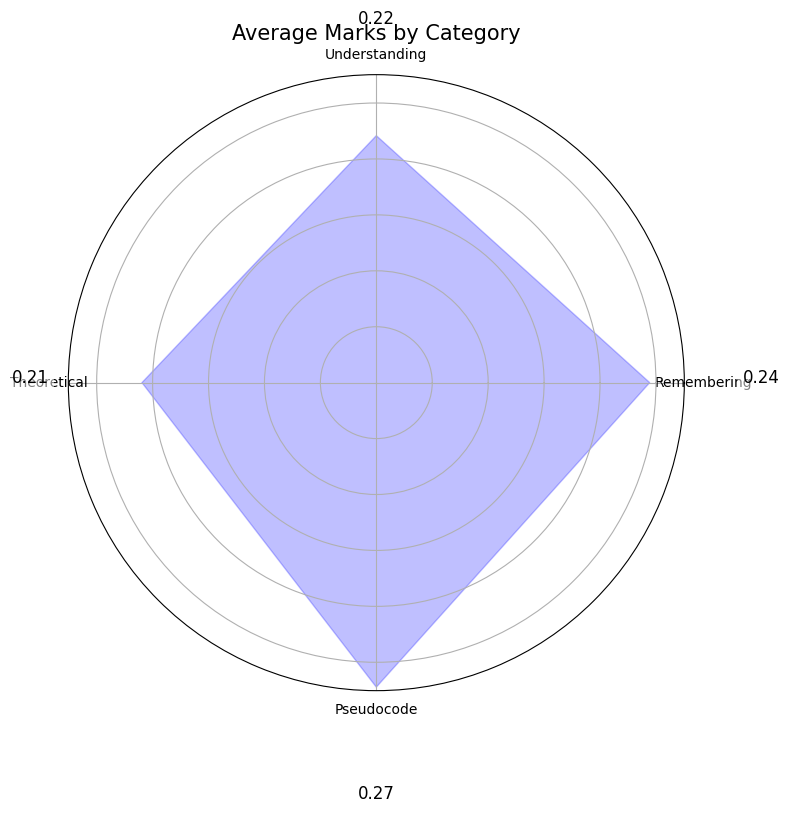

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# Load the quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Test_Responce.csv')


# Initialize a dictionary to hold total marks and counts for each category
category_marks = {
    'Remembering': {'total': 0, 'count': 0},
    'Understanding': {'total': 0, 'count': 0},
    'Theoretical': {'total': 0, 'count': 0},
    'Pseudocode': {'total': 0, 'count': 0}
}

# Extract the categories and correct answers
for _, row in quiz_df.iterrows():
    question = row['Question']
    correct_answer = row['Correct Answer'].strip()
    
    # Find the category based on the question text
    if '(Remembering)' in question:
        category = 'Remembering'
    elif '(Understanding)' in question:
        category = 'Understanding'
    elif '(Theoretical)' in question:
        category = 'Theoretical'
    elif '(Pseudocode)' in question:
        category = 'Pseudocode'
    
    # Check the answers in test_response_df
    for _, response in test_response_df.iterrows():
        student_response = response[question].strip()
        
        # Increment the total for the category regardless of the answer
        category_marks[category]['count'] += 1
        
        # Increment the total marks if the response is correct
        if student_response == correct_answer:
            category_marks[category]['total'] += 1

# Calculate average marks for each category
average_marks = []
for category in category_marks.keys():
    if category_marks[category]['count'] > 0:
        average = category_marks[category]['total'] / category_marks[category]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)

# Prepare data for the spider chart
categories = list(category_marks.keys())
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
average_marks += average_marks[:1]  # Close the circle
angles += angles[:1]

# Create a spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, average_marks, color='blue', alpha=0.25)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add labels with the average marks, spaced out
for i, value in enumerate(average_marks[:-1]):
    angle_rad = angles[i]
    # Adjust the label position to avoid overlap
    label_offset = 0.1  # Distance from the edge of the chart
    ax.text(angle_rad, value + label_offset, f"{value:.2f}", 
            horizontalalignment='center', size=12, 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add a title
plt.title('Average Marks by Category', size=15)
plt.show()

Category and average scores have been saved to 'category_average_scores.csv'.


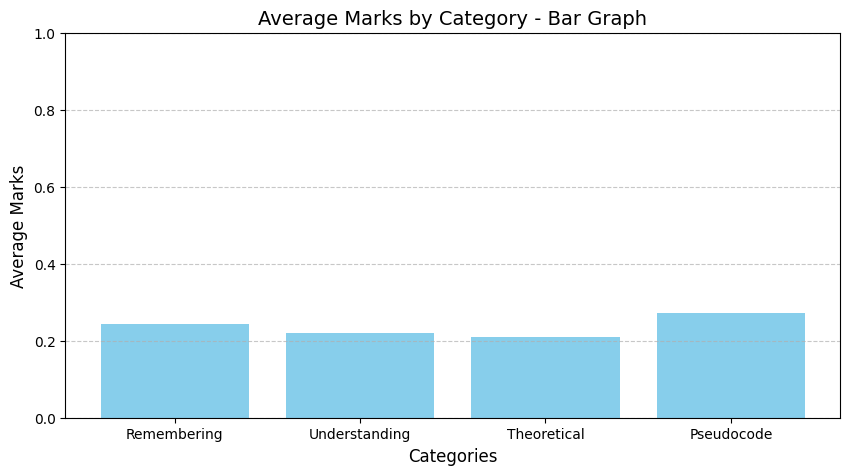

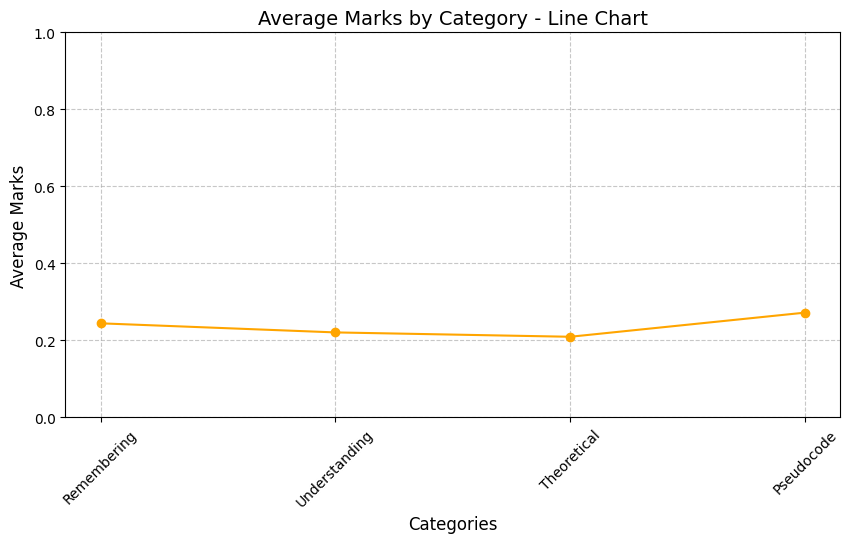

In [27]:
# Calculate average marks for each category
average_marks = []
categories = list(category_marks.keys())
for category in categories:
    if category_marks[category]['count'] > 0:
        average = category_marks[category]['total'] / category_marks[category]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)


# Prepare data for saving category averages
category_data = {'Category': categories, 'Average Score': average_marks}
category_df = pd.DataFrame(category_data)

# Save to CSV
category_df.to_csv('Module2_Quiz_Analysis/category_average_scores.csv', index=False)
print("Category and average scores have been saved to 'category_average_scores.csv'.")

# Bar Graph
plt.figure(figsize=(10, 5))
plt.bar(categories, average_marks, color='skyblue')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Marks', fontsize=12)
plt.title('Average Marks by Category - Bar Graph', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(categories, average_marks, marker='o', linestyle='-', color='orange')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Marks', fontsize=12)
plt.title('Average Marks by Category - Line Chart', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

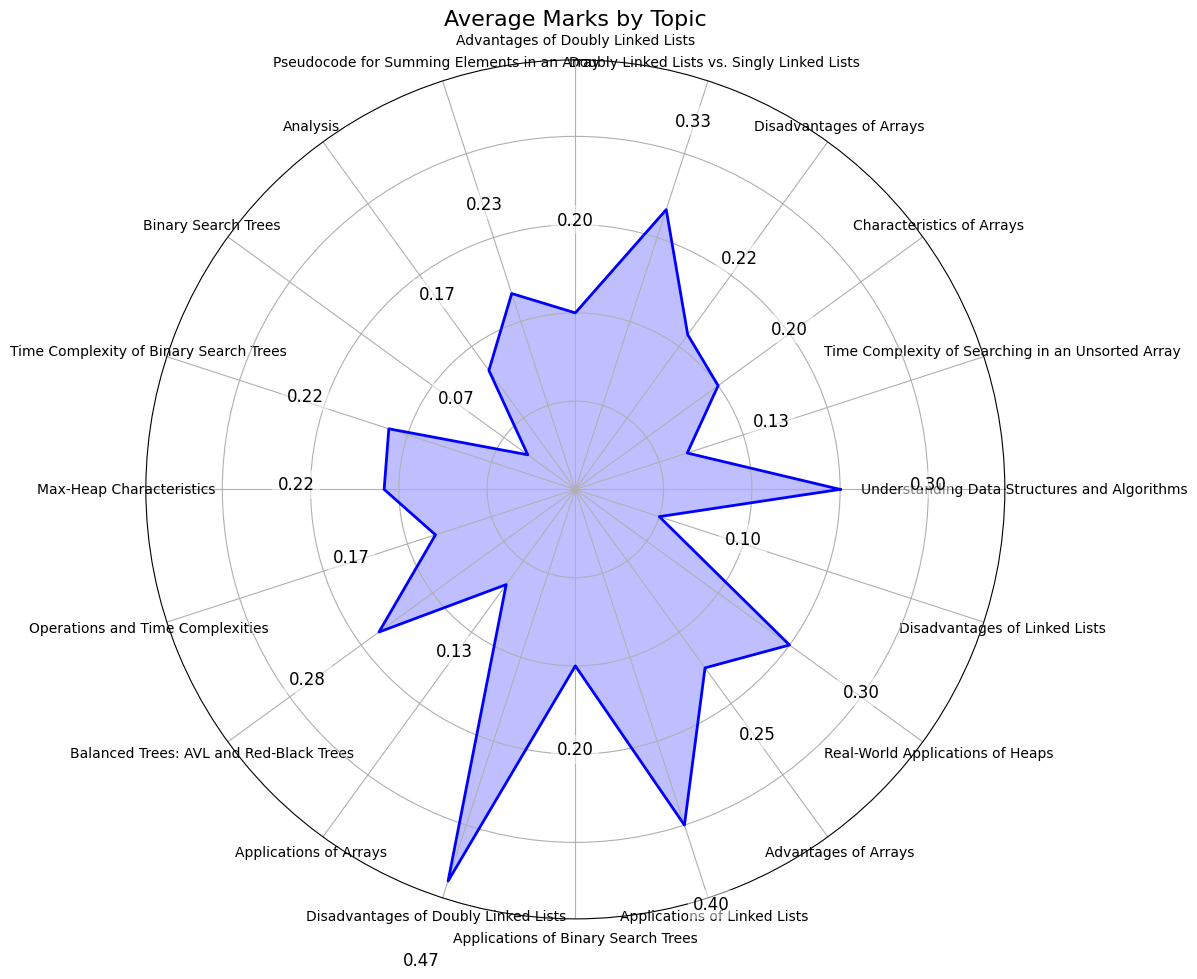

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Test_Responce.csv')

# Initialize a dictionary to hold total marks and counts for each topic
topic_marks = {}

# Extract the topics and correct answers
for _, row in quiz_df.iterrows():
    question = row['Question']
    correct_answer = row['Correct Answer'].strip()
    
    # Extract the topic name dynamically (after the last category closing parenthesis)
    topic_match = re.search(r'\)\s*(.*)', question)  # Match text after the last closing parenthesis
    if topic_match:
        topic = topic_match.group(1).replace('(', '').replace(')', '').strip()  # Extract and clean topic name
    else:
        topic = "Unknown"  # Fallback in case no topic is found

    # Initialize the topic in the dictionary if not already present
    if topic not in topic_marks:
        topic_marks[topic] = {'total': 0, 'count': 0}
    
    # Check the answers in test_response_df
    for _, response in test_response_df.iterrows():
        student_response = response[question].strip()
        
        # Increment the total for the topic regardless of the answer
        topic_marks[topic]['count'] += 1
        
        # Increment the total marks if the response is correct
        if student_response == correct_answer:
            topic_marks[topic]['total'] += 1

# Calculate average marks for each topic
average_marks = []
topics = list(topic_marks.keys())
for topic in topics:
    if topic_marks[topic]['count'] > 0:
        average = topic_marks[topic]['total'] / topic_marks[topic]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)

# Prepare data for the spider chart
angles = np.linspace(0, 2 * np.pi, len(topics), endpoint=False).tolist()
average_marks += average_marks[:1]  # Close the circle
angles += angles[:1]

# Create a spider chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
ax.fill(angles, average_marks, color='blue', alpha=0.25)
ax.plot(angles, average_marks, color='blue', linewidth=2)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(topics, fontsize=10)

# Add labels with the average marks, spaced out
for i, value in enumerate(average_marks[:-1]):
    angle_rad = angles[i]
    # Adjust the label position to avoid overlap
    label_offset = 0.1  # Distance from the edge of the chart
    ax.text(angle_rad, value + label_offset, f"{value:.2f}", 
            horizontalalignment='center', size=12, 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add a title
plt.title('Average Marks by Topic', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
# Calculate average marks for each topic
average_marks = []
topics = list(topic_marks.keys())  # Ensure topics are extracted correctly
for topic in topics:
    if topic_marks[topic]['count'] > 0:
        average = topic_marks[topic]['total'] / topic_marks[topic]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)

# DEBUG: Ensure lengths match
print(f"Topics Length: {len(topics)}")
print(f"Average Marks Length: {len(average_marks)}")
print("Topics List:", topics)
print("Average Marks List:", average_marks)

# Ensure lengths of topics and average marks match
if len(topics) != len(average_marks):
    raise ValueError("Mismatch between topics and average marks length.")

# Save data to CSV
output_data = {'Topic': topics, 'Average Score': average_marks}
output_df = pd.DataFrame(output_data)

# Save to CSV
output_df.to_csv('Module2_Quiz_Analysis/topic_average_scores.csv', index=False)
print("Topic and average scores have been saved to 'topic_average_scores.csv'.")


Topics Length: 20
Average Marks Length: 20
Topics List: ['Understanding Data Structures and Algorithms', 'Time Complexity of Searching in an Unsorted Array', 'Characteristics of Arrays', 'Disadvantages of Arrays', 'Doubly Linked Lists vs. Singly Linked Lists', 'Advantages of Doubly Linked Lists', 'Pseudocode for Summing Elements in an Array', 'Analysis', 'Binary Search Trees', 'Time Complexity of Binary Search Trees', 'Max-Heap Characteristics', 'Operations and Time Complexities', 'Balanced Trees: AVL and Red-Black Trees', 'Applications of Arrays', 'Disadvantages of Doubly Linked Lists', 'Applications of Binary Search Trees', 'Applications of Linked Lists', 'Advantages of Arrays', 'Real-World Applications of Heaps', 'Disadvantages of Linked Lists']
Average Marks List: [0.3, 0.13333333333333333, 0.2, 0.21666666666666667, 0.3333333333333333, 0.2, 0.23333333333333334, 0.16666666666666666, 0.06666666666666667, 0.2222222222222222, 0.21666666666666667, 0.16666666666666666, 0.275, 0.133333333